In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import mysql.connector
import datetime
import math
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [109]:
username = 'root'
user_password = 'Sadegh74'

cnx = mysql.connector.connect(
    user=username,
    password=user_password,
    host='localhost',
    database='final_transfer_market'
)

In [110]:
q_requests = "SELECT * FROM players_season WHERE season = 2021;"
requests = pd.read_sql(q_requests, con=cnx)
requests.head()

,id,player_id,season,club_id,squad,appearance,point_per_goal,goals,assits,own_goals,...,goals_conceded,clean_sheets,minutes_per_goal,minutes_played,competition,age,position,height,current_international,agent
0,2,305686,2021,NaN,1.0,0.0,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,play-off-serie-c,25.0,Central Midfield,185.0,None,None
1,3,305686,2021,NaN,25.0,22.0,1.41,1.0,NaN,NaN,...,NaN,NaN,809.00,809.000,serie-c-girone-b,25.0,Central Midfield,185.0,None,None
2,31,301237,2021,NaN,2.0,2.0,1.50,NaN,NaN,NaN,...,NaN,NaN,NaN,90.000,serie-b-play-out,25.0,Right Winger,169.0,None,None
3,32,301237,2021,NaN,36.0,34.0,0.85,2.0,1.0,NaN,...,NaN,NaN,1.06,2.119,serie-b,25.0,Right Winger,169.0,None,None
4,33,301237,2021,NaN,1.0,1.0,0.00,1.0,1.0,NaN,...,NaN,NaN,70.00,70.000,coppa-italia,25.0,Right Winger,169.0,None,None


In [111]:
requests.isnull().sum()

id                           0
player_id                    0
season                       0
club_id                  12223
squad                        0
appearance                   0
point_per_goal               0
goals                    15145
assits                   15905
own_goals                21404
yellow_card              12485
second_yellow_card       21241
red_card                 21101
penalty_goals            20765
goals_conceded           20338
clean_sheets             20727
minutes_per_goal         15145
minutes_played            2372
competition               7159
age                          5
position                     0
height                     697
current_international    17978
agent                    14534
dtype: int64

In [112]:
requests.iloc[:, 6:18] = requests.iloc[:, 6:18].fillna(0)
requests

,id,player_id,season,club_id,squad,appearance,point_per_goal,goals,assits,own_goals,...,goals_conceded,clean_sheets,minutes_per_goal,minutes_played,competition,age,position,height,current_international,agent
0,2,305686,2021,NaN,1.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.000,play-off-serie-c,25.0,Central Midfield,185.0,None,None
1,3,305686,2021,NaN,25.0,22.0,1.41,1.0,0.0,0.0,...,0.0,0.0,809.00,809.000,serie-c-girone-b,25.0,Central Midfield,185.0,None,None
2,31,301237,2021,NaN,2.0,2.0,1.50,0.0,0.0,0.0,...,0.0,0.0,0.00,90.000,serie-b-play-out,25.0,Right Winger,169.0,None,None
3,32,301237,2021,NaN,36.0,34.0,0.85,2.0,1.0,0.0,...,0.0,0.0,1.06,2.119,serie-b,25.0,Right Winger,169.0,None,None
4,33,301237,2021,NaN,1.0,1.0,0.00,1.0,1.0,0.0,...,0.0,0.0,70.00,70.000,coppa-italia,25.0,Right Winger,169.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,256924,54935,2021,3368.0,13.0,10.0,1.10,0.0,0.0,0.0,...,0.0,0.0,0.00,668.000,laliga,36.0,Centre-Back,180.0,None,None
21833,256925,54935,2021,1390.0,14.0,14.0,0.64,1.0,1.0,0.0,...,0.0,0.0,831.00,831.000,serie-a,36.0,Centre-Back,180.0,None,None
21834,256926,54935,2021,1390.0,1.0,1.0,3.00,0.0,0.0,0.0,...,0.0,0.0,0.00,18.000,coppa-italia,36.0,Centre-Back,180.0,None,None
21835,257024,5578,2021,1421.0,10.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.000,ligue-1,42.0,Goalkeeper,185.0,None,None


In [113]:
positions_type = requests['position'].unique()
positions_type

array(['Central Midfield', 'Right Winger', 'Attacking Midfield',
       'Centre-Back', 'Goalkeeper', 'Centre-Forward',
       'Defensive Midfield', 'Left-Back', 'Right-Back', 'Left Winger',
       'Second Striker', 'Right Midfield', 'Defender', 'midfield',
       'Left Midfield', 'Attack'], dtype=object)

## Players Performance

To evaluate players' performance based on the provided information and considering their position, we define a KPI called "Player Performance Index" (PPI). The PPI will be calculated differently for different player positions, taking into account their specific roles and contributions on the field.
Here's a breakdown of how the Player Performance Index (PPI) can be calculated for different player positions:

### Goalkeepers:
For goalkeepers, the PPI can be calculated using the following formula:
```
PPI_goalkeeper = clean_sheets*(0.4) + goals_conceded*(-0.3) + own_goals*(-0.4) + yellow_card*(-0.03) + second_yellow_card*(-0.05) + red_card*(-0.08) + played_ratio*(0.1)
```

### Defenders:
For defenders, the PPI can be calculated using the following formula:
```
PPI_defender = goals*(0.1) + penalty_goals*(0.05) + assists*(0.1) + clean_sheets*(0.2) + goals_conceded*(-0.2) + own_goals*(-0.4) + yellow_card*(-0.03) + second_yellow_card*(-0.05) + red_card*(-0.08) + played_ratio*(0.1)
```

### Midfielders:
For midfielders, the PPI can be calculated using the following formula:
```
PPI_midfielder = goals*(0.2) + penalty_goals*(0.05) + assists*(0.4) + own_goals*(-0.4) + yellow_card*(-0.03) + second_yellow_card*(-0.05) + red_card*(-0.08) + played_ratio*(0.1)
```

### Forwards:
For forwards, the PPI can be calculated using the following formula:
```
PPI_forward = goals*(0.4) + penalty_goals*(0.05) + assists*(0.2) + own_goals*(-0.4) + yellow_card*(-0.03) + second_yellow_card*(-0.05) + red_card*(-0.08) + played_ratio*(0.1)
```

In [114]:
position_weights = {
    'Goalkeeper': {
        'clean_sheets': 0.4,
        'goals_conceded': -0.3,
        'own_goals': -0.4,
        'yellow_card': -0.03,
        'second_yellow_card': -0.05,
        'red_card': -0.08,
        'played_ratio': 0.1
    },
    'Defense': {
        'goals_conceded': -0.2,
        'clean_sheets': 0.2,
        'goals': 0.1,
        'penalty_goals': 0.05,
        'assits': 0.1,
        'own_goals': -0.4,
        'yellow_card': -0.03,
        'second_yellow_card': -0.05,
        'red_card': -0.08,
        'played_ratio': 0.1
    },
    'Midfielder': {
        'assists': 0.4,
        'goals': 0.2,
        'penalty_goals': 0.05,
        'own_goals': -0.4,
        'yellow_card': -0.03,
        'second_yellow_card': -0.05,
        'red_card': -0.08,
        'played_ratio': 0.1
    },
    'Forward': {
        'goals': 0.4,
        'penalty_goals': 0.05,
        'assists': 0.2,
        'own_goals': -0.4,
        'yellow_card': -0.03,
        'second_yellow_card': -0.05,
        'red_card': -0.08,
        'played_ratio': 0.1
    }
}

In [117]:
def position_type(df, dp):
    try:
        replace_dict = {
            'Central Midfield' : dp[2],
            'Right Winger' : dp[3],
            'Attacking Midfield' : dp[2],
            'Centre-Back' : dp[1],
            'Goalkeeper' : dp[0],
            'Centre-Forward' : dp[3],
            'Defensive Midfield' : dp[1],
            'Left-Back' : dp[1],
            'Right-Back' : dp[1],
            'Left Winger' : dp[3],
            'Second Striker' : dp[3],
            'Right Midfield' : dp[2],
            'Defender' : dp[1],
            'midfield' : dp[2],
            'Left Midfield' : dp[2],
            'Attack' : dp[3]
        }
        df ['position'] = df['position'].replace(replace_dict)
        return df
    except:
        return df

def PPI (df):
    df['PPI'] = 0
    df['played_ratio'] = df['minutes_played'] / (df['squad']*90)
    try:
        for index, row in df.iterrows():
            position = row['position']
            minutes_played = row['minutes_played']
            goals = row['goals']
            assists = row['assits']
            clean_sheets = row['clean_sheets']
            point_per_goal = row['point_per_goal']
            own_goals = row['own_goals']
            yellow_card = row['yellow_card']
            second_yellow_card = row['second_yellow_card']
            red_card = row['red_card']
            penalty_goals = row['penalty_goals']
            goals_conceded = row['goals_conceded']
            played_ratio = row['played_ratio']
            
            if position == 'Goalkeeper':
                df.at[index, 'PPI'] = max(clean_sheets*(0.4) + goals_conceded*(-0.3) + own_goals*(-0.4) + yellow_card*(-0.03) + second_yellow_card*(-0.05) + red_card*(-0.08) + played_ratio*(0.1) , 0)*100
            elif position == 'Defender':
                df.at[index, 'PPI'] = max(goals*(0.1) + penalty_goals*(0.05) + assists*(0.1) + clean_sheets*(0.2) + goals_conceded*(-0.2) + own_goals*(-0.4) + yellow_card*(-0.03) + second_yellow_card*(-0.05) + red_card*(-0.08) + played_ratio*(0.1) , 0)*100
            elif position == 'Midfielder':
                df.at[index, 'PPI'] = max(goals*(0.2) + penalty_goals*(0.05) + assists*(0.4) + own_goals*(-0.4) + yellow_card*(-0.03) + second_yellow_card*(-0.05) + red_card*(-0.08) + played_ratio*(0.1) , 0)*100
            elif position == 'Forward':
                df.at[index, 'PPI'] = max(goals*(0.4) + penalty_goals*(0.05) + assists*(0.2) + own_goals*(-0.4) + yellow_card*(-0.03) + second_yellow_card*(-0.05) + red_card*(-0.08) + played_ratio*(0.1) , 0)*100
            
            
            PPI_values = df['PPI'].values.reshape(-1, 1)
            scaler = MinMaxScaler()
            normalized_values = scaler.fit_transform(PPI_values)
            df['PPI'] = normalized_values
        return df
    except:
        return df

In [118]:
dp = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
requests = position_type(requests, dp)
requests

,id,player_id,season,club_id,squad,appearance,point_per_goal,goals,assits,own_goals,...,goals_conceded,clean_sheets,minutes_per_goal,minutes_played,competition,age,position,height,current_international,agent
0,2,305686,2021,NaN,1.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.000,play-off-serie-c,25.0,Midfielder,185.0,None,None
1,3,305686,2021,NaN,25.0,22.0,1.41,1.0,0.0,0.0,...,0.0,0.0,809.00,809.000,serie-c-girone-b,25.0,Midfielder,185.0,None,None
2,31,301237,2021,NaN,2.0,2.0,1.50,0.0,0.0,0.0,...,0.0,0.0,0.00,90.000,serie-b-play-out,25.0,Forward,169.0,None,None
3,32,301237,2021,NaN,36.0,34.0,0.85,2.0,1.0,0.0,...,0.0,0.0,1.06,2.119,serie-b,25.0,Forward,169.0,None,None
4,33,301237,2021,NaN,1.0,1.0,0.00,1.0,1.0,0.0,...,0.0,0.0,70.00,70.000,coppa-italia,25.0,Forward,169.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,256924,54935,2021,3368.0,13.0,10.0,1.10,0.0,0.0,0.0,...,0.0,0.0,0.00,668.000,laliga,36.0,Defender,180.0,None,None
21833,256925,54935,2021,1390.0,14.0,14.0,0.64,1.0,1.0,0.0,...,0.0,0.0,831.00,831.000,serie-a,36.0,Defender,180.0,None,None
21834,256926,54935,2021,1390.0,1.0,1.0,3.00,0.0,0.0,0.0,...,0.0,0.0,0.00,18.000,coppa-italia,36.0,Defender,180.0,None,None
21835,257024,5578,2021,1421.0,10.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.000,ligue-1,42.0,Goalkeeper,185.0,None,None


# 3. Players Request

The following code demonstrates how to retrieve players' data from a MySQL database using Python's `pandas` library and the `mysql.connector` module.
The code begins by importing necessary libraries such as numpy, pandas, matplotlib.pyplot, and pathlib. It also imports the mysql.connector module for establishing a connection with the MySQL database.

We need to provide your MySQL database username and password in the variables username and user_password, respectively.
The code establishes a connection to the MySQL database using the mysql.connector.connect() method. You need to specify the host and database details accordingly.

In [119]:
requests = PPI(requests)
players_req = requests
players_req1 = players_req.dropna(subset=['club_id'])
defense = players_req1[(players_req1['position'] == 'Defender') | (players_req1['position'] == 'Goalkeeper')]
club_defense = defense.groupby('club_id').mean().reset_index()
club_defense.rename(columns={'PPI': 'defense_PPI'}, inplace=True)
attack = players_req1[(players_req1['position'] == 'Forward') | (players_req1['position'] == 'Midfielder')]
club_attack = attack.groupby('club_id').mean().reset_index()
club_attack.rename(columns={'PPI': 'attack_PPI'}, inplace=True)
final_players_req = club_defense.merge(club_attack, on='club_id', how='inner')
final_players_req = final_players_req[['club_id', 'defense_PPI', 'attack_PPI']]
final_players_req['difference_PPI'] = final_players_req['defense_PPI'] - final_players_req['attack_PPI']
final_players_req['PPI_ratio'] = final_players_req['defense_PPI']/final_players_req['attack_PPI']
fina_players_req = final_players_req.sort_values(by=['difference_PPI', 'PPI_ratio'], ascending=False)
fina_players_req

,club_id,defense_PPI,attack_PPI,difference_PPI,PPI_ratio
116,1390.0,4.054054e-02,0.000000e+00,4.054054e-02,inf
16,38.0,3.976866e-21,0.000000e+00,3.976866e-21,inf
106,1110.0,2.335648e-100,0.000000e+00,2.335648e-100,inf
26,80.0,2.980431e-102,0.000000e+00,2.980431e-102,inf
85,873.0,1.162574e-111,0.000000e+00,1.162574e-111,inf
...,...,...,...,...,...
22,46.0,1.382464e-77,3.330030e-57,-3.330030e-57,4.151507e-21
82,800.0,1.919908e-268,8.220857e-46,-8.220857e-46,2.335411e-223
54,398.0,0.000000e+00,1.063948e-25,-1.063948e-25,0.000000e+00
59,416.0,0.000000e+00,2.988171e-19,-2.988171e-19,0.000000e+00


#### - Goal Difference Efficiency (GDE) [Another KPI]

The Goal Difference Efficiency (GDE) is a Key Performance Indicator (KPI) used to evaluate the performance of football teams based on their goal-scoring ability and defensive record. It provides insights into the relative strength of a team's attack compared to their defense.

#### - Formula

The GDE is calculated using the following formula:

GDE = Goals Scored / Goals Conceded


#### - Interpretation

A higher GDE value indicates a stronger attacking performance relative to defensive capabilities. It suggests that the team is effective at scoring goals while maintaining a solid defensive record. On the other hand, a lower GDE value signifies weaker attackers and potentially stronger defenses.

In [120]:
q_players_req2 = 'SELECT c.name, clubs_season.goals_scored, clubs_season.goals_conceded FROM clubs_season JOIN clubs c on clubs_season.club_id = c.id WHERE c.season = 2021;'
players_req2 = pd.read_sql(q_players_req2, con=cnx)
players_req2

,name,goals_scored,goals_conceded
0,Arminia Bielefeld,None,None
1,VfL Bochum,None,None
2,Leeds United,None,None
3,Wolverhampton Wanderers,None,None
4,Venezia FC,None,None
5,Venezia FC,None,None


In [121]:
players_req2["GDE"] = players_req2["goals_scored"]/players_req2["goals_conceded"]
players_req2 = players_req.sort_values(by="GDE", ascending=True)
players_req2.head()

KeyError: 'GDE'

# 4. Manager Request

In [122]:
q_manager = "SELECT ps.*, market_value FROM transfers AS t LEFT JOIN players_season ps on t.player_id = ps.player_id AND t.season = ps.season LEFT JOIN players p on t.player_id = p.id WHERE t.season = 2021;"
manager_req = pd.read_sql(q_manager, con=cnx)
manager_req = position_type(manager_req, dp)
manager_req = PPI(manager_req)
manager_req

,id,player_id,season,club_id,squad,appearance,point_per_goal,goals,assits,own_goals,...,minutes_played,competition,age,position,height,current_international,agent,market_value,PPI,played_ratio
0,42036.0,316884,2021.0,237.0,14.0,1.0,0.0,NaN,NaN,NaN,...,90.000,laliga,26.0,Goalkeeper,197.0,None,None,2000000.0,0,0.071429
1,42037.0,316884,2021.0,237.0,1.0,1.0,3.0,NaN,NaN,NaN,...,120.000,copa-del-rey,26.0,Goalkeeper,197.0,None,None,2000000.0,0,1.333333
2,232737.0,65318,2021.0,237.0,31.0,25.0,1.0,NaN,4.0,NaN,...,1.832,laliga,35.0,Defender,171.0,None,None,1200000.0,0,0.000657
3,232738.0,65318,2021.0,237.0,5.0,3.0,2.0,NaN,1.0,NaN,...,224.000,copa-del-rey,35.0,Defender,171.0,None,None,1200000.0,0,0.497778
4,197769.0,557149,2021.0,237.0,33.0,30.0,0.8,1.0,2.0,1.0,...,1.406,laliga,22.0,Midfielder,173.0,South Korea,None,6000000.0,0,0.000473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,209994.0,391719,2021.0,931.0,5.0,2.0,1.5,NaN,NaN,NaN,...,92.000,championship,23.0,Midfielder,173.0,None,None,3000000.0,0,0.204444
4231,209995.0,391719,2021.0,931.0,1.0,1.0,0.0,NaN,NaN,NaN,...,41.000,efl-cup,23.0,Midfielder,173.0,None,None,3000000.0,0,0.455556
4232,122909.0,631221,2021.0,16795.0,31.0,8.0,1.0,NaN,NaN,NaN,...,281.000,laliga,22.0,Midfielder,180.0,None,Promoesport,300000.0,0,0.100717
4233,122910.0,631221,2021.0,NaN,2.0,0.0,0.0,NaN,NaN,NaN,...,NaN,segunda-division-r-f-e-f-grupo-v,22.0,Midfielder,180.0,None,Promoesport,300000.0,0,NaN


In [123]:
manager_req['PPI_Percentile'] = manager_req['PPI'].rank(pct=True)
manager_req['Value_Percentile'] = manager_req['market_value'].rank(pct=True)

top_performer_threshold = manager_req['PPI_Percentile'].quantile(0.6)
cheapest_players_threshold = manager_req['Value_Percentile'].quantile(0.7)

filtered_players = manager_req[
    (manager_req['PPI_Percentile'] >= top_performer_threshold) &
    (manager_req['Value_Percentile'] <= cheapest_players_threshold)
]

filtered_players = filtered_players.sort_values(by='PPI', ascending=False).head()
filtered_players

,id,player_id,season,club_id,squad,appearance,point_per_goal,goals,assits,own_goals,...,age,position,height,current_international,agent,market_value,PPI,played_ratio,PPI_Percentile,Value_Percentile
0,42036.0,316884,2021.0,237.0,14.0,1.0,0.00,NaN,NaN,NaN,...,26.0,Goalkeeper,197.0,None,None,2000000.0,0,0.071429,0.500118,0.386307
2770,138187.0,87469,2021.0,331.0,2.0,2.0,3.00,NaN,1.0,NaN,...,33.0,Defender,182.0,None,None,1500000.0,0,0.744444,0.500118,0.311382
2772,72322.0,488626,2021.0,331.0,1.0,1.0,3.00,NaN,NaN,NaN,...,23.0,Defender,182.0,None,None,800000.0,0,1.000000,0.500118,0.193216
2773,156485.0,471474,2021.0,331.0,38.0,26.0,1.46,1.0,1.0,NaN,...,23.0,Midfielder,181.0,None,None,2500000.0,0,0.254386,0.500118,0.442346
2774,156486.0,471474,2021.0,331.0,3.0,3.0,2.00,NaN,1.0,NaN,...,23.0,Midfielder,181.0,None,None,2500000.0,0,0.903704,0.500118,0.442346


### 4.1. Compare Distribution of Filtered Players' Performance with All Players

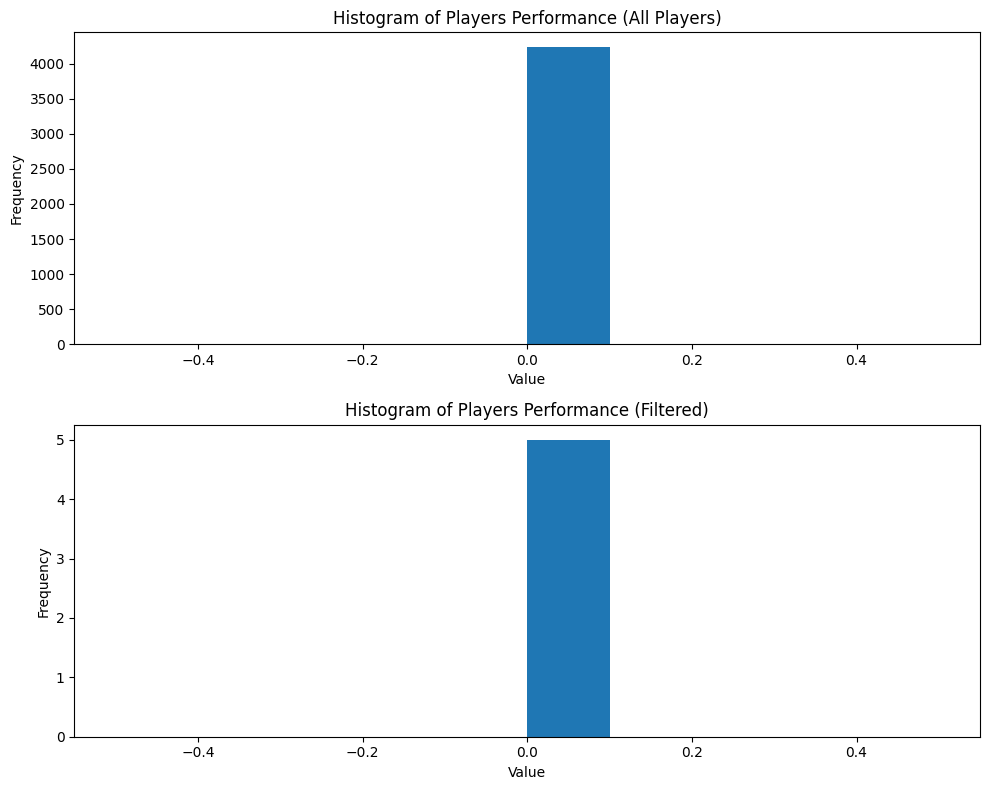

In [124]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.hist(manager_req['PPI'], label='All Players')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Players Performance (All Players)')

ax2.hist(filtered_players['PPI'], label='Filtered Players')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Players Performance (Filtered)')

plt.tight_layout()
plt.show()

### 4.2. Compare Distribution of Filtered Players' Value with All Players

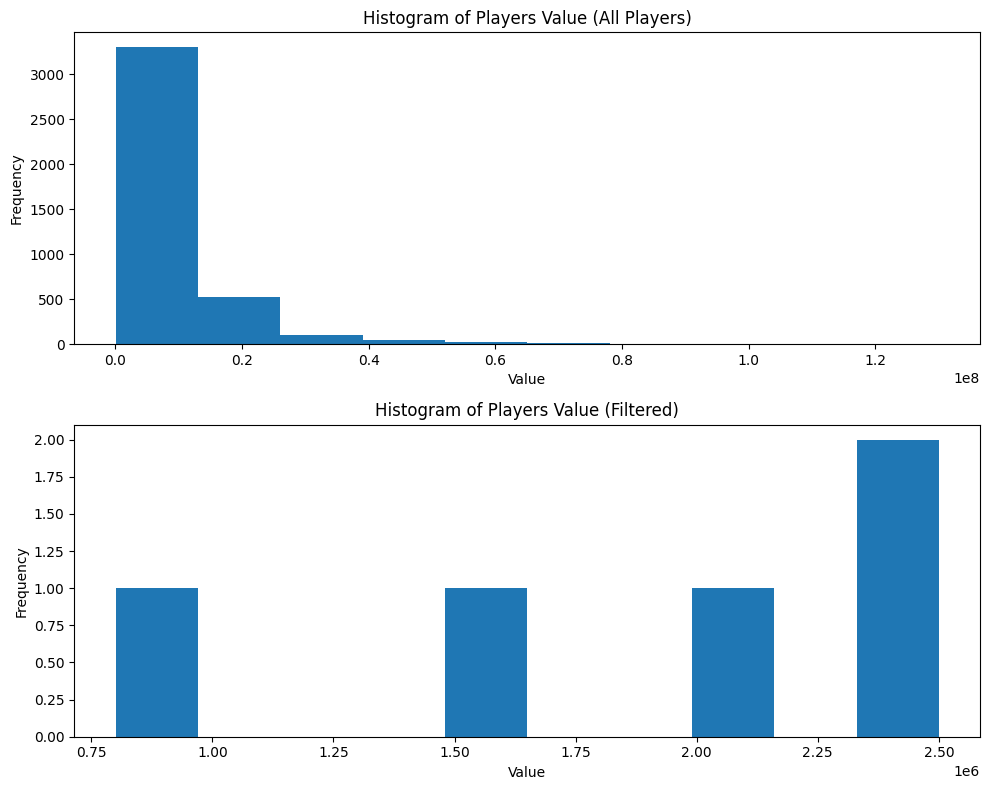

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.hist(manager_req['market_value'], label='All Players')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Players Value (All Players)')

ax2.hist(filtered_players['market_value'], label='Filtered Players')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Players Value (Filtered)')

plt.tight_layout()
plt.show()

### 4.3. Compare Distribution of Filtered Players' position with All Players

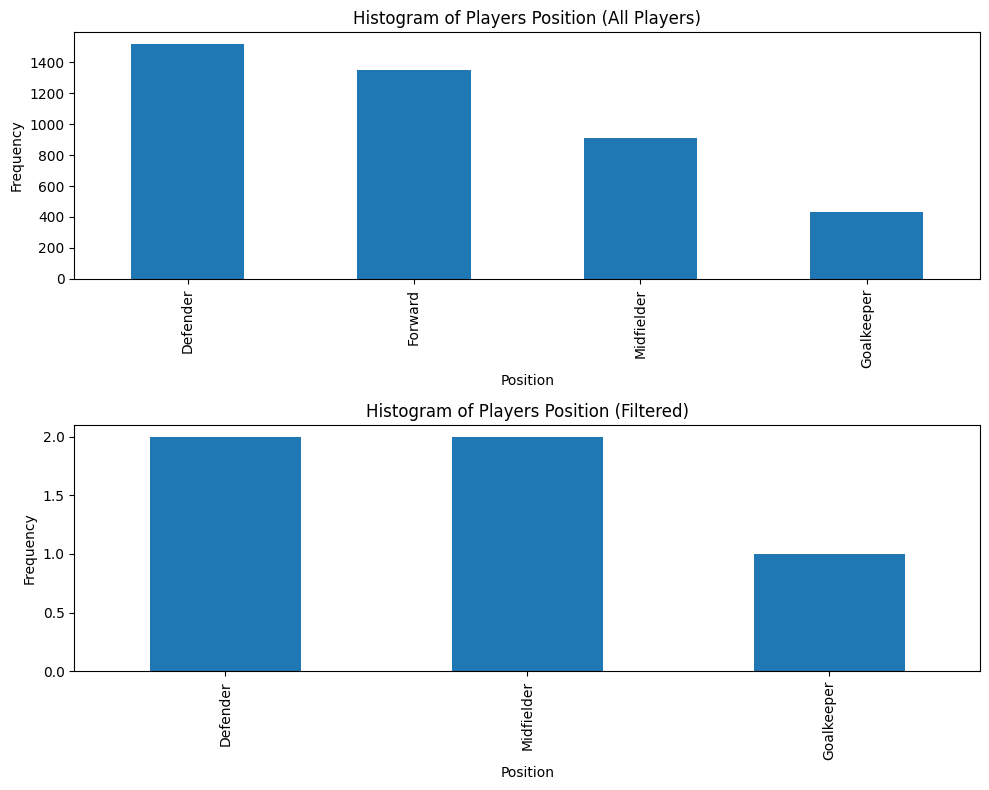

In [ ]:
category_counts_manager = manager_req['position'].value_counts()
category_counts_filtered = filtered_players['position'].value_counts()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

category_counts_manager.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Position')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Players Position (All Players)')

category_counts_filtered.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Position')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Players Position (Filtered)')

plt.tight_layout()
plt.show()


### 4.4. Identifying Underperforming Players

In [ ]:
q4_manager = "SELECT * FROM (SELECT ps.*, c.name FROM players_season AS ps LEFT JOIN competitions c on ps.competition = c.id WHERE season = 2021) AS d1 LEFT JOIN (SELECT * FROM clubs_season cs WHERE season = 2021) AS d2 on d1.club_id = d2.club_id WHERE d2.rank = 1;"
manager_req4 = pd.read_sql(q4_manager, con=cnx)
manager_req4 = position_type(manager_req4, dp)
manager_req4 = PPI(manager_req4)
manager_req4.head()

,id,player_id,season,club_id,squad,appearance,point_per_goal,goals,assits,own_goals,...,rank,matches,win,draw,loss,goals_scored,goals_conceded,players_avg_age,PPI,played_ratio
0,8573,85148,2021,583,21.0,18.0,2.50,2.0,1.0,NaN,...,1,None,None,None,None,None,None,None,NaN,0.285714
1,8574,85148,2021,583,6.0,4.0,1.25,NaN,1.0,NaN,...,1,None,None,None,None,None,None,None,NaN,0.261111
2,8575,85148,2021,583,1.0,1.0,0.00,NaN,NaN,NaN,...,1,None,None,None,None,None,None,None,NaN,1.000000
3,8576,85148,2021,583,1.0,1.0,0.00,NaN,NaN,NaN,...,1,None,None,None,None,None,None,None,NaN,1.000000
4,16134,74230,2021,583,2.0,2.0,3.00,1.0,NaN,NaN,...,1,None,None,None,None,None,None,None,NaN,0.111111


In [ ]:
top_leagues = ['Premier League', 'LaLiga', 'Bundesliga', 'Serie A', 'Ligue 1']
champions = manager_req4[manager_req4['name'].isin(top_leagues)].copy()
champions

,id,player_id,season,club_id,squad,appearance,point_per_goal,goals,assits,own_goals,...,rank,matches,win,draw,loss,goals_scored,goals_conceded,players_avg_age,PPI,played_ratio
0,8573,85148,2021,583,21.0,18.0,2.50,2.0,1.0,NaN,...,1,None,None,None,None,None,None,None,NaN,0.285714
4,16134,74230,2021,583,2.0,2.0,3.00,1.0,NaN,NaN,...,1,None,None,None,None,None,None,None,NaN,0.111111
6,21372,126710,2021,583,2.0,0.0,0.00,NaN,NaN,NaN,...,1,None,None,None,None,None,None,None,0.0,NaN
9,23030,181767,2021,583,33.0,32.0,2.13,5.0,NaN,NaN,...,1,None,None,None,None,None,None,None,0.0,0.000964
12,25120,126719,2021,583,22.0,15.0,2.33,NaN,NaN,NaN,...,1,None,None,None,None,None,None,None,0.0,0.486869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,217038,281963,2021,27,26.0,25.0,2.36,NaN,2.0,NaN,...,1,None,None,None,None,None,None,None,0.0,0.000871
2011,217537,336869,2021,27,24.0,9.0,2.44,NaN,NaN,NaN,...,1,None,None,None,None,None,None,None,0.0,0.175000
2013,219673,31741,2021,27,1.0,0.0,0.00,NaN,NaN,NaN,...,1,None,None,None,None,None,None,None,0.0,NaN
2014,230986,192565,2021,27,32.0,32.0,2.38,7.0,7.0,NaN,...,1,None,None,None,None,None,None,None,0.0,0.000687


In [ ]:
q1 = champions['PPI'].quantile(0.25)
q3 = champions['PPI'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = champions[(champions['PPI'] < lower_bound) | (champions['PPI'] > upper_bound)]
outliers = outliers.sort_values('PPI', ascending=False)
outliers

,id,player_id,season,club_id,squad,appearance,point_per_goal,goals,assits,own_goals,...,rank,matches,win,draw,loss,goals_scored,goals_conceded,players_avg_age,PPI,played_ratio
